## 1. Recommender system
When you watch YouTube, order food online, buy books online, listen to Spotify, use LinkedIn, you constantly receive recommendations for new videos, dishes, etc. What lies behind these is a type of recommender system.

# Recommender System:

- Part of unsupervised machine learning, recommender systems analyze patterns in data to make personalized recommendations to users.

# Recommender system have two types.

- 1:Content-Based Filtering
    - This method looks at what users have liked in the past and recommends similar items. It's like when you watch a movie on a streaming platform, and it suggests other films with similar themes or actors based on your preferences and the content of the movies themselves.


- 2: Colloborative Filtering
    - Instead of focusing on the characteristics of items, collaborative filtering pays attention to what similar users have liked. It's like when you see recommendations on an online store based on what other shoppers with similar tastes have purchased or liked.


# Problem in recommending system

- Cold start problem
    -  Occurs when there is limited data for new users or items, making it challenging to provide accurate recommendations. Strategies like hybrid systems are used to address this issue effectively.

# The combination of above both filtering

- Hybrid Recommender System
    - This system combines different recommendation approaches to improve accuracy. For instance, it might blend content-based and collaborative filtering methods to offer more personalized suggestions. It's like when a music app combines your listening history with the preferences of users similar to you to recommend songs, especially when you're new to the platform.



1.1 - Movielens full - EDA
Now download the dataset ml-latest.zip under the section "recommended for education and development". Read the data sets "movies.csv" and "ratings.csv" answer the following questions below.
- a) Do an EDA to understand the dataset. Include different types of plots. Do not limit yourself to the questions below, but try to examine more aspects of the data.


In [1]:
import pandas as pd

df_movies = pd.read_csv("../data/movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
df_movies.tail()

,movieId,title,genres
86532,288967,State of Siege: Temple Attack (2021),Action|Drama
86533,288971,Ouija Japan (2021),Action|Horror
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller
86536,288983,UNZIPPED: An Autopsy of American Inequality (2...,Documentary


# b) What are the 10 movies with the most ratings?

In [3]:
df_rating = pd.read_csv("../data/ratings.csv")
df_rating

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765


In [4]:
count_movie_rating = df_rating.groupby("movieId")["rating"].count()

sort_count_list = count_movie_rating.sort_values(ascending= False)

top_10 = sort_count_list.head(10)

top_10 = top_10.reset_index() 

top_10 = top_10.rename(columns={'rating': 'rating_count'})

print(top_10)

   movieId  rating_count
0      318        122296
1      356        113581
2      296        108756
3     2571        107056
4      593        101802
5      260         97202
6     2959         86207
7      527         84232
8      480         83026
9     1196         80200


# c) Calculate the average rating for these 10 movies with the most ratings.

In [33]:
rating_count = df_rating['movieId'].value_counts()
top_10= rating_count.head(10)

top_10_movies_data = df_rating[df_rating['movieId'].isin(top_10.index)]

top_10_movies_data_average = top_10_movies_data.groupby('movieId')['rating'].mean()

top_10_movies_data_average

movieId
260     4.092400
296     4.191778
318     4.416792
356     4.068189
480     3.689013
527     4.242337
593     4.150287
1196    4.118030
2571    4.160631
2959    4.236019
Name: rating, dtype: float64

# d) Plot the years and number of movies represented in the dataset.


In [6]:
df_movies['year'] = df_movies['title'].str.extract(r'\((\d{4})\)$')

df_movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),Action|Drama,2021
86533,288971,Ouija Japan (2021),Action|Horror,2021
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,1973
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller,2023


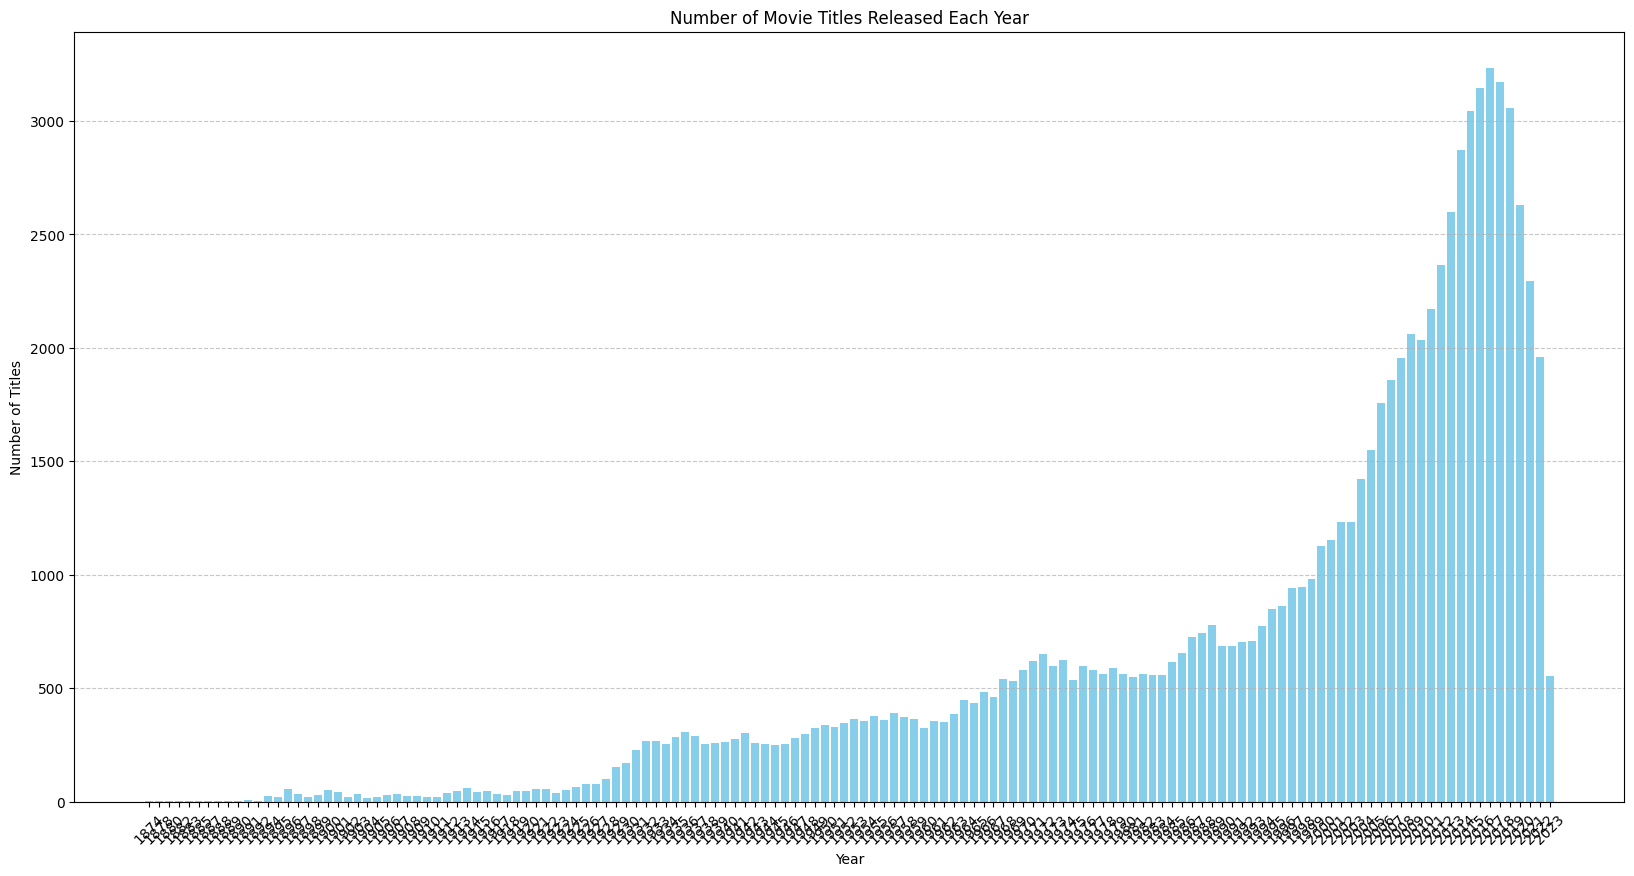

In [7]:
import matplotlib.pyplot as plt

# Group by 'year' and count the number of titles for each year
titles_per_year = df_movies.groupby('year')['title'].count()

# Plotting
plt.figure(figsize=(20, 10))
plt.bar(titles_per_year.index, titles_per_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.title('Number of Movie Titles Released Each Year')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# e) Make a plot of the number of ratings against movieId.

In [12]:
df_rating

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765


In [23]:
rating_count = df_rating.groupby('movieId').size()

rating_count

movieId
1         76813
2         30209
3         15820
4          3028
5         15801
          ...  
288967        1
288971        1
288975        1
288977        1
288983        1
Length: 83239, dtype: int64

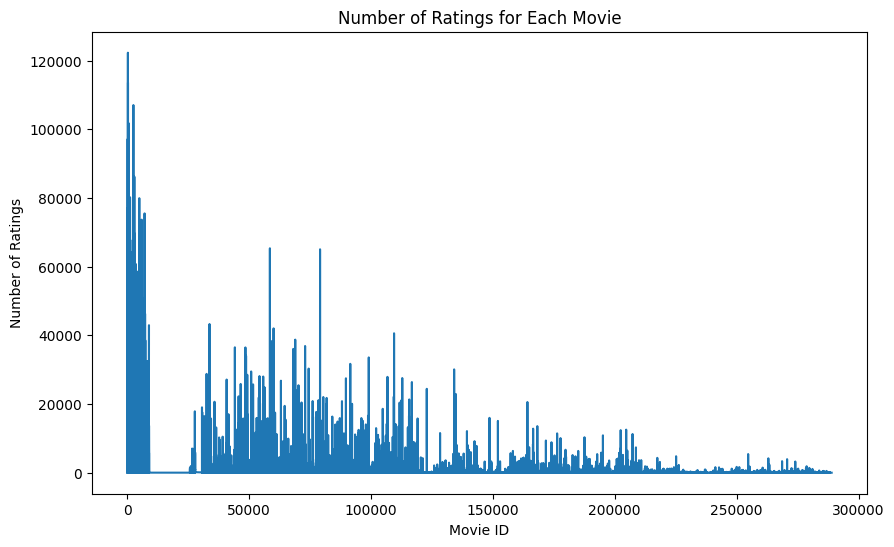

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(rating_count.index, rating_count.values)
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings for Each Movie')
plt.show()


# f) Calculate average ratings for the top 10 movies with the most ratings. Make a bar graph of these.



In [38]:
top_10_movies_data_average

movieId
260     4.092400
296     4.191778
318     4.416792
356     4.068189
480     3.689013
527     4.242337
593     4.150287
1196    4.118030
2571    4.160631
2959    4.236019
Name: rating, dtype: float64

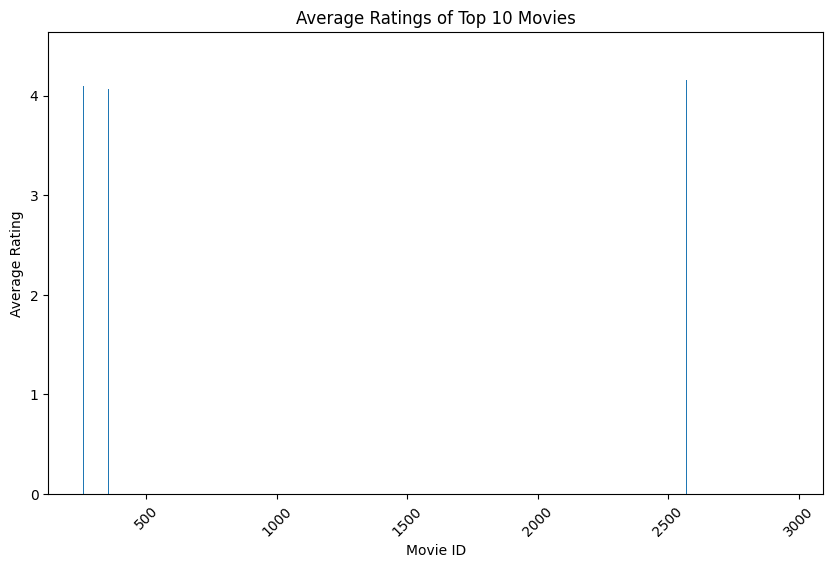

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.bar(top_10_movies_data_average.index , top_10_movies_data_average.values)

plt.xlabel('Movie ID')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Top 10 Movies')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

# 1.2 Create sparse matrix

As in the video in task 1.0, you created a pivot table of the dataframe with index: "movieId", columns: "userId" and values: "ratings". However, this pivot table is "expensive" to create and your computer probably won't be able to create it unless you filter out some data. Think of a suitable way to filter your data set, try your hand at it and justify it.
Create a sparse matrix of this pivot table using scipy.sparse.csc_matrix(). If you want to use all the data, it can also be solved, but you need to solve how to create the sparse matrix without pandas pivot table.

In [39]:
import numpy as np
from scipy.sparse import csc_matrix

# Create dummy data
data = {
    'userId': [1, 2, 3, 4, 5] * 5,  # 5 users
    'movieId': [101, 102, 103, 104, 105] * 5,  # 5 movies
    'rating': [5, 4, 3, 2, 1] * 5  # Ratings from 5 to 1 for each movie by each user
}

# Create DataFrame
df = pd.DataFrame(data)

# Print dummy data
print("Dummy Data:")
print(df)

# Create pivot table (not feasible for large datasets)
pivot_table = df.pivot_table(index='movieId', columns='userId', values='rating', fill_value=0)

# Print pivot table
print("\nPivot Table:")
print(pivot_table)

# Convert pivot table to sparse matrix
sparse_matrix = csc_matrix(pivot_table.values)

# Print sparse matrix
print("\nSparse Matrix:")
print(sparse_matrix)


Dummy Data:
    userId  movieId  rating
0        1      101       5
1        2      102       4
2        3      103       3
3        4      104       2
4        5      105       1
5        1      101       5
6        2      102       4
7        3      103       3
8        4      104       2
9        5      105       1
10       1      101       5
11       2      102       4
12       3      103       3
13       4      104       2
14       5      105       1
15       1      101       5
16       2      102       4
17       3      103       3
18       4      104       2
19       5      105       1
20       1      101       5
21       2      102       4
22       3      103       3
23       4      104       2
24       5      105       1

Pivot Table:
userId     1    2    3    4    5
movieId                         
101      5.0  0.0  0.0  0.0  0.0
102      0.0  4.0  0.0  0.0  0.0
103      0.0  0.0  3.0  0.0  0.0
104      0.0  0.0  0.0  2.0  0.0
105      0.0  0.0  0.0  0.0  1.0

Sparse Matrix:

# 1.3 Recommender system

Create a recommender system with KNN and let the system take input from the user and print the top 5 recommended movies, based on the user's search query. Please note that there is a logical error in the video that makes the recommendations not so good, try to find the error and fix it.
            a) Describe in words how your system works.

            b) Look online and read more about recommender systems and briefly describe how they work. Don't forget to cite the source.